## Wine Quality Classifier (Model Training and Experiment Tracking):
* [Model Training and Hyperparameter Tuning](#training)
* [Test Model Performance on 6 DataPoints](#model-performance)
* [Experiment Tracking & Model Registration](#experiment-tracking)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import mlflow

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

<a id="training"></a>
# Model Training and Hyperparameter Tuning

In [12]:
# Load training data and assign the X_train and y_train
train_df = pd.read_csv('training_data/train_dataset.csv')

X_train = train_df.drop(['best quality'], axis=1)
y_train = train_df['best quality']

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
train_df.head()


X_train.shape:  (1119, 11)
y_train.shape:  (1119,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,1
1,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2,0
2,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0,0
3,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,1
4,7.5,0.58,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8,0


In [13]:
# Load testing data and assign the X_test and y_test
test_df = pd.read_csv('testing_data/test_dataset.csv')

X_test = test_df.drop(['best quality'], axis=1)
y_test = test_df['best quality']

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

test_df.head()

X_test.shape:  (384, 11)
y_test.shape:  (384,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,7.2,0.635,0.07,2.6,0.077,16.0,86.0,0.99748,3.51,0.54,9.7,0
1,7.9,0.350,0.21,1.9,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,0
2,6.0,0.510,0.00,2.1,0.064,40.0,54.0,0.99500,3.54,0.93,10.7,1
3,10.2,0.290,0.49,2.6,0.059,5.0,13.0,0.99760,3.05,0.74,10.5,1
4,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5,0


In [14]:
# Model training for Logistic Regression
solver='lbfgs' # lbfgs, liblinear (only for binary classification)
penalty='l2' # l1, l2
class_weight='balanced'
max_iter = 100
random_state = 4444
model_logreg = LogisticRegression(
            solver=solver, 
            penalty=penalty,
            max_iter=max_iter, 
            random_state=random_state,
            multi_class ='auto', 
            class_weight=class_weight
            )
model_logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=4444)

In [15]:
# Calculate predictions
train_preds = model_logreg.predict(X_train)
val_preds = model_logreg.predict(X_test)

print('Logistic Regression:')
training_accuracy = metrics.accuracy_score(y_train, train_preds)
val_accuracy=metrics.accuracy_score(y_test, val_preds)
print('Training Accuracy: {:.2f}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.2f}%'.format(val_accuracy * 100))


Logistic Regression:
Training Accuracy: 75.60%
Validation Accuracy: 72.14%


In [16]:
# Validation
y_pred = model_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 72.14%


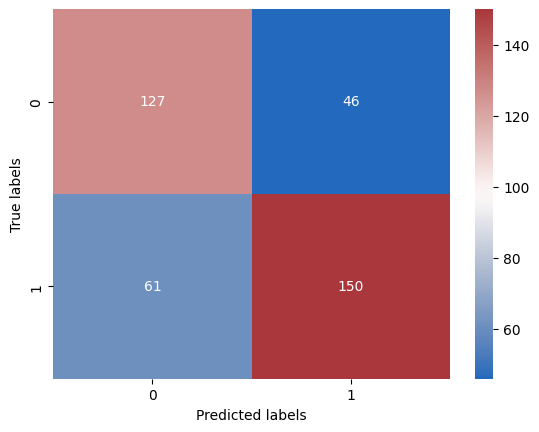

In [17]:
# Defining confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig('confusion_matrix.png')
plt.show()

In [18]:
# Print the classification report for the best performing model.
# print(metrics.classification_report(y_test, model_logreg.predict(X_test)))
clf_report_dict = metrics.classification_report(y_test, model_logreg.predict(X_test), output_dict=True)
clf_report_df = pd.DataFrame(clf_report_dict).transpose()
print(clf_report_df.head())
clf_report_df.to_csv("clf_report_df.csv")


              precision    recall  f1-score     support
0              0.675532  0.734104  0.703601  173.000000
1              0.765306  0.710900  0.737101  211.000000
accuracy       0.721354  0.721354  0.721354    0.721354
macro avg      0.720419  0.722502  0.720351  384.000000
weighted avg   0.724861  0.721354  0.722008  384.000000


<a id="model-performance"></a>
# Test Model Performance on some DataPoints

In [19]:
# Test Model Performance on 5 data points from testing_data/test_dataset.csvt
test_df_6 = test_df.head(5)

# Prepare the test input by dropping the 'best quality' columns
test_df_6_input = test_df_6.drop(['best quality'], axis=1)

# Extract the actual Wine Quality for the first 6 examples from test_dataset
actual_class_test = test_df_6['best quality']

# Use the trained model to predict the class for the test input
predicted_class_test = pd.DataFrame(model_logreg.predict(test_df_6_input), columns=['Predicted Wine Quality'])

# Combine predicted and actual classes into a single DataFrame
model_output = pd.concat([predicted_class_test, actual_class_test.reset_index(drop=True)], axis=1)

# Rename columns for clarity
model_output.columns = ['Predicted Wine Quality', 'Actual Wine Quality']

print(model_output)

   Predicted Wine Quality  Actual Wine Quality
0                       0                    0
1                       0                    0
2                       1                    1
3                       1                    1
4                       1                    0


##### The first part of the Hands-On Lab is now complete. 
##### After learning about the concepts of MLOps, we will continue with the rest of the notebook.

##### In the Second part of the Hands-On Lab, we install first the MLflow.
##### Then store the models and its artifacts on the MLflow server.
##### Finally, we deploy the model on both local and openshift cluster.

<a id="experiment-tracking"></a>
# Experiment Tracking & Model Registration

Logistic Regression:
Training Accuracy: 75.60%
Validation Accuracy: 72.14%


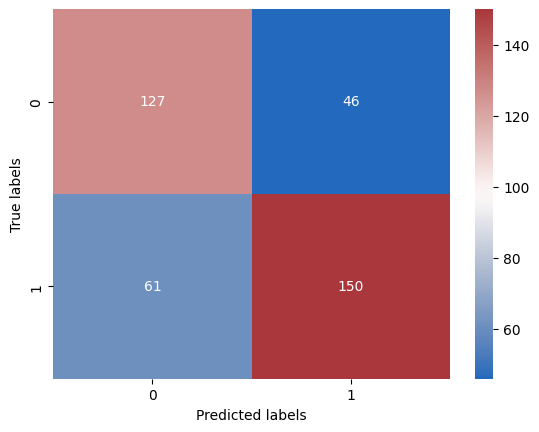

              precision    recall  f1-score     support
0              0.675532  0.734104  0.703601  173.000000
1              0.765306  0.710900  0.737101  211.000000
accuracy       0.721354  0.721354  0.721354    0.721354
macro avg      0.720419  0.722502  0.720351  384.000000
weighted avg   0.724861  0.721354  0.722008  384.000000


In [61]:
# Model training for Logistic Regression
solver='lbfgs' # lbfgs, liblinear (only for binary classification)
penalty='l2' # l1, l2
class_weight='balanced'
max_iter = 100 # 100, 500, 1000
random_state = 1234 # 4444, 8888
model_logreg = LogisticRegression(
            solver=solver, 
            penalty=penalty,
            max_iter=max_iter, 
            random_state=random_state,
            multi_class ='auto', 
            class_weight=class_weight,
            )
model_logreg.fit(X_train, y_train)

# Calculate predictions
train_preds = model_logreg.predict(X_train)
val_preds = model_logreg.predict(X_test)

print('Logistic Regression:')
training_accuracy = metrics.accuracy_score(y_train, train_preds)
val_accuracy=metrics.accuracy_score(y_test, val_preds)
print('Training Accuracy: {:.2f}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.2f}%'.format(val_accuracy * 100))

# Defining confusion matrix
y_pred = model_logreg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig('confusion_matrix.png')
plt.show()

# Print the classification report for the best performing model.
clf_report_dict = metrics.classification_report(y_test, model_logreg.predict(X_test), output_dict=True)
clf_report_df = pd.DataFrame(clf_report_dict).transpose()
print(clf_report_df.head())
clf_report_df.to_csv("clf_report_df.csv")


In [54]:
# Store Model and its dependencies on MLFlow
mlflow.set_tracking_uri(uri="http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/")
mlflow.set_experiment("max logistic regression clf - wine quality")

artifact_path = "model_logreg"
model_name = "max_LogRegWineModel"

with mlflow.start_run():
    
    # store model's parameters
    mlflow.log_param("solver", solver)
    mlflow.log_param("penalty", penalty)
    mlflow.log_param("max_iter", max_iter)
    mlflow.log_param("random_state", random_state)
    mlflow.log_param("class_weight", class_weight)
    
    # store model's metrices
    mlflow.log_metric("Training Accuracy", training_accuracy)
    mlflow.log_metric("Validation Accuracy", val_accuracy)

    # store confusion matrix as an image
    # mlflow.log_figure(confusion_matrix, 'confusion_matrix.png')
    mlflow.log_artifact('./confusion_matrix.png')

    # store Classification report as a CSV file
    mlflow.log_artifact('./clf_report_df.csv')

    # store model
    mlflow.sklearn.log_model(
        sk_model=model_logreg,
        artifact_path=artifact_path,
        registered_model_name=model_name,
    )

2025/02/03 12:07:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'max_LogRegWineModel' already exists. Creating a new version of this model...
2025/02/03 12:07:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: max_LogRegWineModel, version 15
Created version '15' of model 'max_LogRegWineModel'.


🏃 View run fun-grouse-122 at: http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/#/experiments/14/runs/bdadf9c74db14e6199b7f1c9634f54a4
🧪 View experiment at: http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/#/experiments/14


<<<<< IGNORE BELOW CELLs >>>>>

<<<<< The notebook will be further developed >>>>>

In [16]:
test_df_6_input.to_json(orient ='split')

'{"columns":["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],"index":[0,1,2,3,4,5],"data":[[4.6,0.445,0.0,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2],[6.5,0.18,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.6,11.5],[8.3,0.16,0.37,7.9,0.025,38.0,107.0,0.99306,2.93,0.37,11.9],[5.9,0.44,0.36,2.5,0.03,12.0,73.0,0.99201,3.22,0.48,10.8],[5.8,0.18,0.28,1.3,0.034,9.0,94.0,0.99092,3.21,0.52,11.2],[7.3,0.2,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0]]}'

In [17]:
test_df_6_input.to_json(orient ='values')

'[[4.6,0.445,0.0,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2],[6.5,0.18,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.6,11.5],[8.3,0.16,0.37,7.9,0.025,38.0,107.0,0.99306,2.93,0.37,11.9],[5.9,0.44,0.36,2.5,0.03,12.0,73.0,0.99201,3.22,0.48,10.8],[5.8,0.18,0.28,1.3,0.034,9.0,94.0,0.99092,3.21,0.52,11.2],[7.3,0.2,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0]]'